<a href="https://colab.research.google.com/github/SolarHO/FloodDamage_BigData/blob/main/%ED%99%8D%EC%88%98%ED%94%BC%ED%95%B4_%EB%89%B4%EC%8A%A4_%EB%B9%88%EB%8F%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) 2021년~2023년 뉴스 광역시도 별 홍수피해 뉴스 빈도 분석

In [ ]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np

In [ ]:
#기상재해(홍수) 피해기사 기반 자연어처리 데이터(강원대학교)
df21 = pd.read_csv("weather_disaster_articles_flood_1990_2021.csv")
df23 = pd.read_csv("weather_disaster_articles_flood_2023.csv")

#두 데이터 결합 및 칼럼명 변경
df = pd.concat([df21, df23], ignore_index=True)
df.columns = ['기사작성일자','기사링크','기사제목','제목명사','기사본문','본문명사','기상요소','광역시도구분','시군구구분','시군구코드구분']

df.to_csv("홍수피해 뉴스.csv", index=False, encoding="utf-8-sig")

#광역시도구분 칼럼을 리스트로 변환
df['광역시도구분'] = df['광역시도구분'].apply(ast.literal_eval)
#기사 작성일자 date 타입으로 변환
df['기사작성일자'] = pd.to_datetime(df['기사작성일자'], format='mixed', errors='coerce')

#21년도부터 23년도 사이의 데이터만 필터링
df_21_23 = df[(df['기사작성일자'].dt.year >= 2021) & (df['기사작성일자'].dt.year <= 2023)]

# 리스트를 개별 값으로 나누어 각 값이 하나의 행이 되도록 변환
df_21_23 = df_21_23.explode("광역시도구분")

print(df_21_23.head())

          기사작성일자                                               기사링크  \
10071 2021-06-01  https://news.kbs.co.kr/news/view.do?ncd=519850...   
10072 2021-06-02  https://view.asiae.co.kr/article/2021060208594...   
10073 2021-06-02  http://www.newsis.com/view/?id=NISX20210602_00...   
10074 2021-06-02  http://www.ibulgyo.com/news/articleView.html?i...   
10075 2021-06-03  http://www.incheonilbo.com/news/articleView.ht...   
...          ...                                                ...   
14284 2023-09-21  http://www.yonhapnewstv.co.kr/MYH2023092100160...   
14284 2023-09-21  http://www.yonhapnewstv.co.kr/MYH2023092100160...   
14285 2023-09-22  https://www.ksilbo.co.kr/news/articleView.html...   
14285 2023-09-22  https://www.ksilbo.co.kr/news/articleView.html...   
14286 2023-09-23   https://www.upinews.kr/newsView/1065584377421900   

                                         기사제목  \
10071                   강릉 상습침수 지역 올해는 문제 없나?   
10072          목포해경, 신안 자은도 해상서 좌초 선박 ‘긴급 구조’   


<ipython-input-15-e99133b448a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_21_23, x="광역시도구분", palette="viridis")


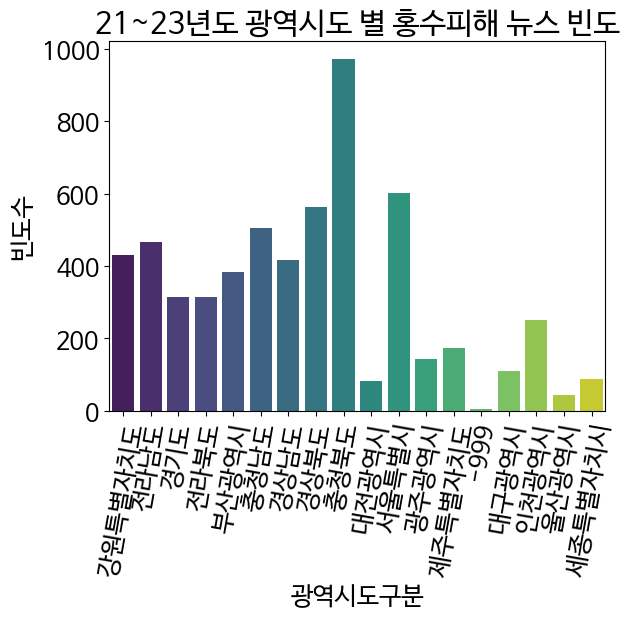

In [ ]:
#21~23년도 광역시도 별 홍수피해 뉴스 빈도 (countplot 사용)
sns.countplot(data=df_21_23, x="광역시도구분", palette="viridis")
plt.title("21~23년도 광역시도 별 홍수피해 뉴스 빈도")
plt.xlabel("광역시도구분")
plt.ylabel("빈도수")
plt.xticks(rotation=80)
plt.show()